# Рабочая тетрадь 4
## Криваксин Никита ИКБО-30-21

### Задание 1
#### Представтье собственные данные и построите экстрополяцию полиномами первой, второй и третьей степени

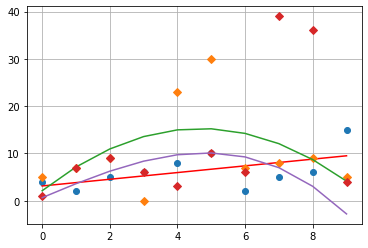

In [4]:
import numpy as np
from matplotlib import pyplot as plt

y_1= np.array([4,2,5,6,8,10,2,5,6,15])
x_1= np.arange(10)
A = np.vstack([x_1, np.ones(len(x_1))]).T
m,c = np.linalg.lstsq(A, y_1, rcond = None)[0]
plt.grid()
plt.plot(x_1,y_1, 'o')
plt.plot(x_1, m*x_1 + c, 'r')

y_2= np.array([5,7,9,0,23,30,7,8,9,5])
x_2= np.arange(10)
h = np.vstack([x_2**2, x_2, np.ones(len(x_2))]).T
e = np.linalg.lstsq(h, y_2, rcond = None)[0]
plt.plot(x_2, y_2, 'D')
plt.plot(x_2, e[0]*x_2**2 + e[1]*x_2+ e[2])

y_3= np.array([1,7,9,6,3,10,6,39,36,4])
x_3= np.arange(10)
l = np.vstack([x_3**2, x_3**2, x_3, np.ones(len(x_2))]).T
p = np.linalg.lstsq(l, y_3, rcond = None)[0]
plt.plot(x_3, y_3, 'D')
plt.plot(x_3, p[0]*x_3**3 + p[1]*x_3**2 + p[2]*x_2+ p[3])


### Задание 2
#### Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

[0.65196075 0.5468532 ]
0.0006869302862283819


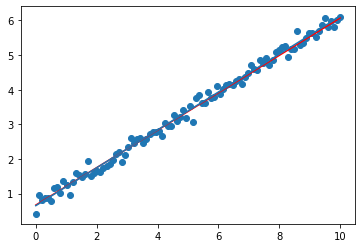

In [87]:
import scipy as sp
from scipy.optimize import curve_fit
beta = (0.67, 0.54)
def f(x, b0, b1):
    return b0 + b1*x
xdata = np.linspace(0, 10, 100)
y = f(xdata, *beta)

ydata = y + 0.15*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)


plt.scatter(xdata, ydata)
plt.plot(xdata, y, 'r')
plt.plot(xdata, f(xdata, *beta_opt))

### Задание 3
#### Постройте модель линейной регрессии для произвольных данных из двухстолбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.


[9312.57512673]


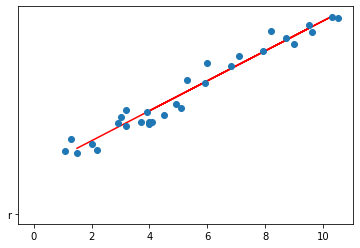

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url="https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df= pd.read_csv(url)
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

print(reg.coef_)

y_pred = reg.predict(x_test)

plt.plot(x_test, y_pred,'r')
plt.plot(x,y, 'o','r')

### Задание 4
#### Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [223]:
url="https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df= pd.read_csv(url)


x1 = df.iloc[:,0].values
x2 = df.iloc[:,5].values
x3 = df.iloc[:,6].values
y = df.iloc[:,11].values

x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)
x3 = pd.DataFrame(x3)

x = pd.concat([x1,x2,x3], axis=1, join = "inner")

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

coeff_dff = pd.DataFrame(reg.coef_, x.columns)

y_pred = reg.predict(x_test)
df = pd.DataFrame(y_test, y_pred)

print(coeff_dff)
df.head(10)



          0
0  0.057878
0  0.008474
0 -0.005892


,0
5.770786,6
5.734484,5
5.783554,7
5.856029,6
6.001976,5
5.369070,6
5.768586,5
5.867411,6
5.745539,4
5.390140,5


### Задание 5*
#### Экспериментально получены N − значений величины Y приразличных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

            0
0.0  4.380952
0.2  4.295238
0.4  4.209524
0.6  4.123810
0.8  4.038095
1.0  3.952381
            0
0.0  4.380952
0.2  4.295238
0.4  4.209524
0.6  4.123810
0.8  4.038095
1.0  3.952381


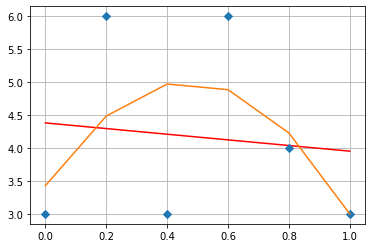

In [255]:
#Вариант 1
x = (0.0,0.2,0.4,0.6,0.8,1.0)
y = (3.0,6.0,3.0,6.0,4.0,3.0)
x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A, y, rcond = None)[0]
plt.grid()
plt.plot(x, m*x + c, 'r')

y1= m*x + c
y1 = pd.DataFrame(y1, x)
print(y1)

h = np.vstack([x**2, x, np.ones(len(x))]).T
e = np.linalg.lstsq(h, y, rcond = None)[0]
plt.plot(x, y, 'D')
plt.plot(x, e[0]*x**2 + e[1]*x+ e[2])

y2= e[0]*x**2 + e[1]*x+ e[2]
y2 = pd.DataFrame(y2, x)
print(y1)